In [1]:
# Necessary libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataframes, where df is all combined, df1 is print, df2 is print 2,..
df = pd.read_csv("df.csv") 
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")

In [3]:
# Investigating acquisition time delays

df[['timetime', 'timeperf_counter']].describe().style.set_caption("Ultimaker acquisition delays").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '15px')
    ]
}])

,timetime,timeperf_counter
count,12647.000000,12647.000000
mean,1.120988,1.123085
std,0.280812,0.280933
min,0.571313,0.571934
25%,0.941138,0.943361
50%,1.083664,1.085956
75%,1.249215,1.251295
max,5.186358,5.187223


In [4]:
df[['timeperf_counter']].describe().style.set_caption("Ultimaker").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '20px')
    ]
}])

,timeperf_counter
count,12647.000000
mean,1.123085
std,0.280933
min,0.571934
25%,0.943361
50%,1.085956
75%,1.251295
max,5.187223


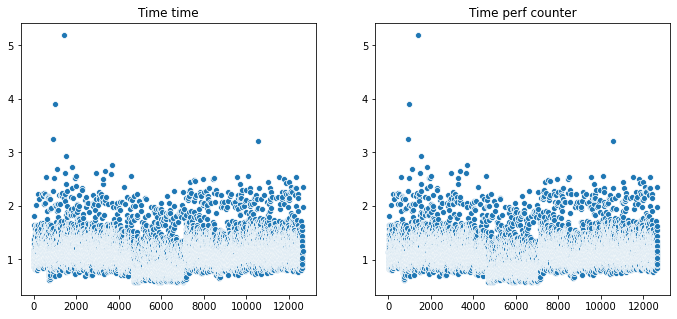

In [5]:
fig = plt.figure(figsize = (18,5))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
sns.scatterplot(data=df['timetime'])
ax1.title.set_text('Time time')

ax2 = plt.subplot(1,3,2)
ax2.title.set_text('Time perf counter')
sns.scatterplot(data=df['timeperf_counter'])

In [6]:
#Investigating difference between Time time and Time perf counter
df_delays = df[['timetime', 'timeperf_counter']]
df_delays = df_delays.assign(Delay_difference = df_delays['timetime'] - df['timeperf_counter'])
df_delays.describe()

,timetime,timeperf_counter,Delay_difference
count,12647.000000,12647.000000,12647.000000
mean,1.120988,1.123085,-0.002097
std,0.280812,0.280933,0.003249
min,0.571313,0.571934,-0.015570
25%,0.941138,0.943361,-0.000866
50%,1.083664,1.085956,-0.000593
75%,1.249215,1.251295,-0.000403
max,5.186358,5.187223,0.000658


# Investigating Temperature variaiton

In [7]:
df[['Hot_end_temperature','Build_platform_temperature']].describe()

,Hot_end_temperature,Build_platform_temperature
count,12647.000000,12647.000000
mean,199.981529,59.701530
std,0.676442,0.202290
min,128.400000,58.794445
25%,199.900000,59.571198
50%,200.000000,59.709192
75%,200.000000,59.845272
max,202.200000,60.468167


In [8]:
#Investigating where the extreme value of 128.4°C of hot end temperature occured
df.loc[df['Hot_end_temperature'] <= 128.4].index

Int64Index([8526], dtype='int64')

In [9]:

#Function uses time from "Date" to convert to process time 
def process_time(df):
    df['Date'] = pd.to_datetime(df['Date'])

    #Create column of process time based on date time
    df['Process_time'] = df['Date'].iloc[-1] - df['Date'].shift()
    df['Process_time'] = df['Process_time'].fillna(pd.Timedelta(seconds=0))
    df['Process_time'] = df['Process_time'].dt.seconds

    #Invert column so time start from 0
    df.Process_time = df.Process_time.values[::-1]
    
process_time(df1)
process_time(df2)
process_time(df3)


#Merge data frames and generate new indexes
data_frames = [df1, df2, df3]

df = pd.concat(data_frames,ignore_index=True)

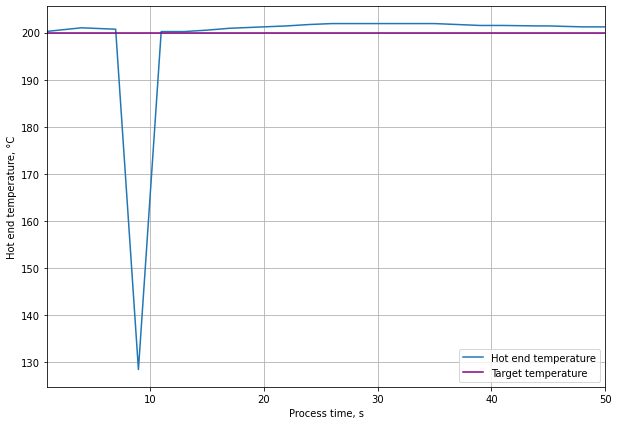

In [10]:
#Selecting part where extreme value occured
data = df[df['Part']== df.loc[8526]['Part']]
#Narrowing down to where the event occured



fig, ax = plt.subplots(1, figsize=(10, 7))
ax.set_xlim(left=1, right=50)
sns.lineplot('Process_time','Hot_end_temperature',data=data,label = 'Hot end temperature')
ax.axhline(data.iloc[0]['Hot_end_target_temperature'], color='purple', label='Target temperature')

legend = plt.legend(loc ='lower right')
legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Hot end temperature, \xb0C")
plt.grid(True)

In [11]:
#Droping that row due to the assumption that data was false, as temperature drops from 200.7 to 128.4 in 2 seconds
df = df.drop(df.loc[df['Hot_end_temperature'] <= 128.4].index)
df3 = df3.drop(df3.loc[df3['Hot_end_temperature'] <= 128.4].index)

df[['Hot_end_temperature','Build_platform_temperature']].describe()

,Hot_end_temperature,Build_platform_temperature
count,12646.000000,12646.000000
mean,199.987190,59.701508
std,0.228836,0.202283
min,198.100000,58.794445
25%,199.900000,59.571173
50%,200.000000,59.709189
75%,200.000000,59.845190
max,202.200000,60.468167


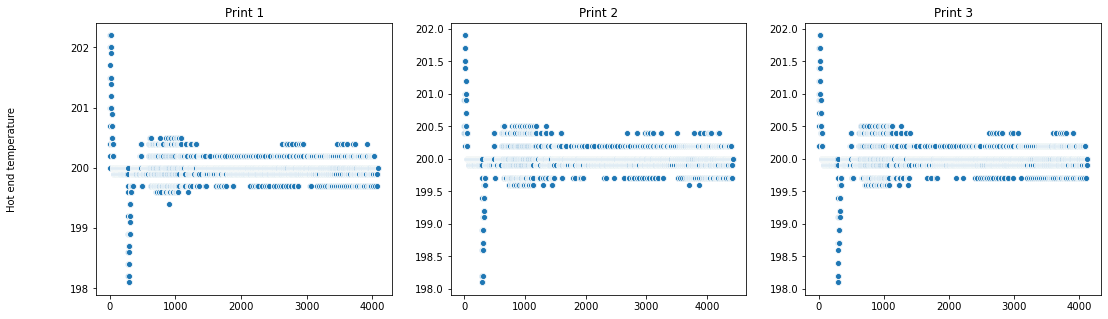

In [12]:
#Ploting scatterplot of temperature for each print 
#Data is plotted chronologically seems like, therefore can use this to identify when abnormal temperature values occured

fig = plt.figure(figsize = (18,5))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
sns.scatterplot(data=df1['Hot_end_temperature'])
ax1.title.set_text('Print 1')

ax2 = plt.subplot(1,3,2)
ax2.title.set_text('Print 2')
sns.scatterplot(data=df2['Hot_end_temperature'])

ax3 = plt.subplot(1,3,3)
ax3.title.set_text('Print 3')
sns.scatterplot(data=df3['Hot_end_temperature'])

fig.text(0.5, 0.04, '', ha='center', va='center')
fig.text(0.06, 0.5, 'Hot end temperature', ha='center', va='center', rotation='vertical')
plt.rcParams["font.size"] = "15"

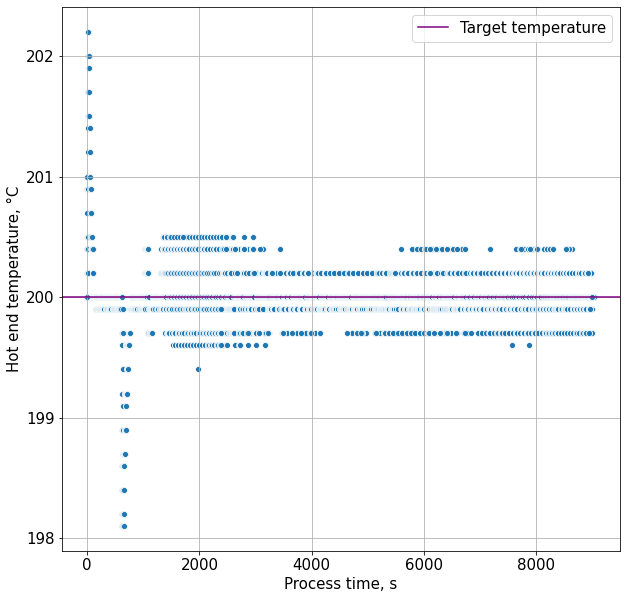

In [26]:
#Ploting scatterplot of all prints 
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.scatterplot( x = 'Process_time', y = 'Hot_end_temperature', data = df)
ax.axhline(df['Hot_end_target_temperature'][0], color='purple', label='Target temperature')
legend = plt.legend(loc ='upper right')

legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Hot end temperature, \xb0C")
#plt.style.use("dark_background")
plt.grid()
  
plt.show()

In [14]:
#Investigating type of unique fan speed values
df['Fan_speed'].unique()

array([  0.        ,  33.33333333,  66.66666667, 100.        ])

In [15]:
#Identifying index of where fan speed turned on to 33%
f_1 = (df1['Fan_speed'] == df['Fan_speed'].unique()[1]).idxmax()
f_2 = (df2['Fan_speed'] == df['Fan_speed'].unique()[1]).idxmax()
f_3 = (df3['Fan_speed'] == df['Fan_speed'].unique()[1]).idxmax()

#Finding process time of where second layer started based on the index for each print
f_1 = df1['Process_time'].loc[f_1]
f_2 = df1['Process_time'].loc[f_2]
f_3 = df1['Process_time'].loc[f_3]

average_process_time = (f_1 + f_2 + f_3)/3


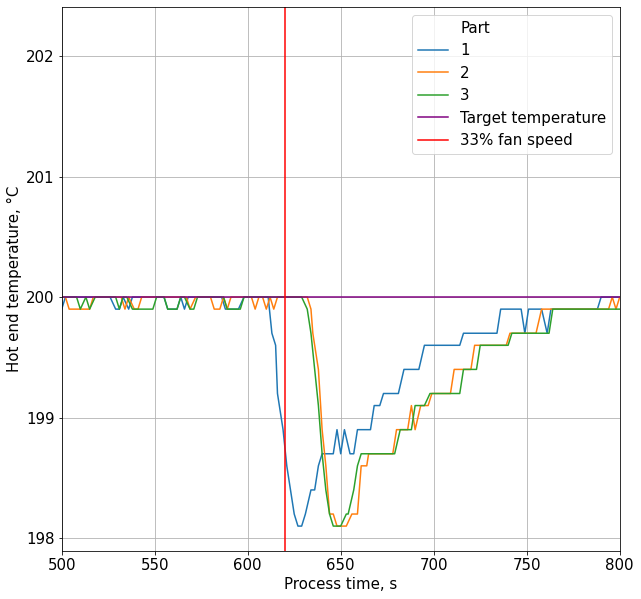

In [16]:
#Line plot of hot end temperature when fan speed turns on from 0 to 33%

fig, ax = plt.subplots(1, figsize=(10, 10))
sns.lineplot(data=df, x='Process_time', y="Hot_end_temperature", hue="Part", ci=None, palette=["C0", "C1", "C2"])
ax.axhline(df.iloc[0]['Hot_end_target_temperature'], color='purple', label='Target temperature')
ax.axvline(average_process_time, color='red', label='33% fan speed')
ax.set_xlim(left=500, right=800)
legend = plt.legend(loc ='upper right')
legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Hot end temperature, \xb0C")

#plt.style.use("dark_background")
plt.grid()  
plt.show()

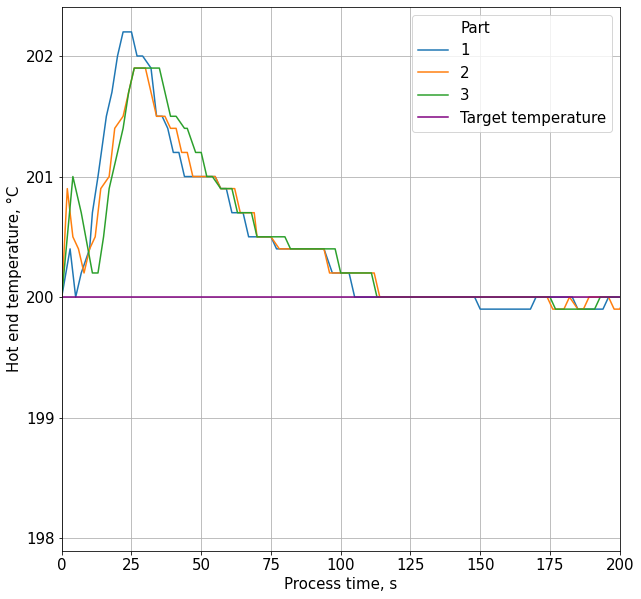

In [17]:
#Lineplot of temperature during start of the process where it was reached the highest values according to scatterplot

fig, ax = plt.subplots(1, figsize=(10, 10))
sns.lineplot(data=df, x='Process_time', y="Hot_end_temperature", hue="Part", ci=None, palette=["C0", "C1", "C2"])
ax.axhline(df.iloc[0]['Hot_end_target_temperature'], color='purple', label='Target temperature')
ax.set_xlim(left=0, right=200)
legend = plt.legend(loc ='upper right')
legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Hot end temperature, \xb0C")

#plt.style.use("dark_background")
plt.grid()  
plt.show()

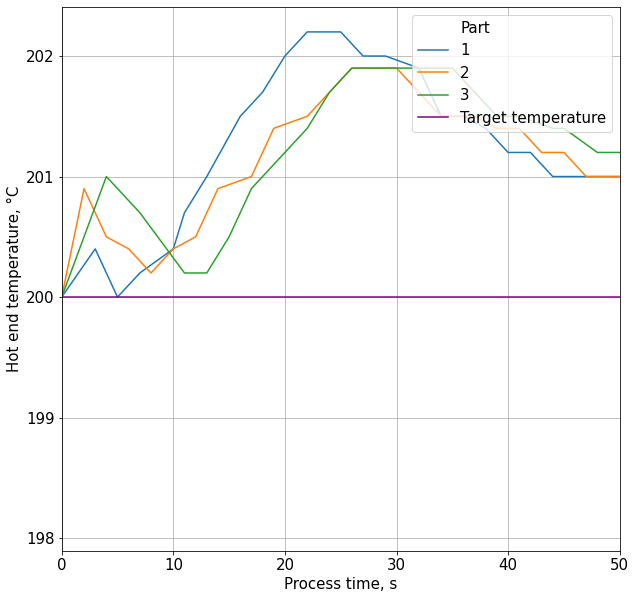

In [18]:
#Lineplot of temperature during start of the process where it was reached the highest values according to scatterplot

fig, ax = plt.subplots(1, figsize=(10, 10))
sns.lineplot(data=df, x='Process_time', y="Hot_end_temperature", hue="Part", ci=None, palette=["C0", "C1", "C2"])
ax.axhline(df.iloc[0]['Hot_end_target_temperature'], color='purple', label='Target temperature')
ax.set_xlim(left=0, right=50)
legend = plt.legend(loc ='upper right')
legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Hot end temperature, \xb0C")

#plt.style.use("dark_background")
plt.grid()  
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

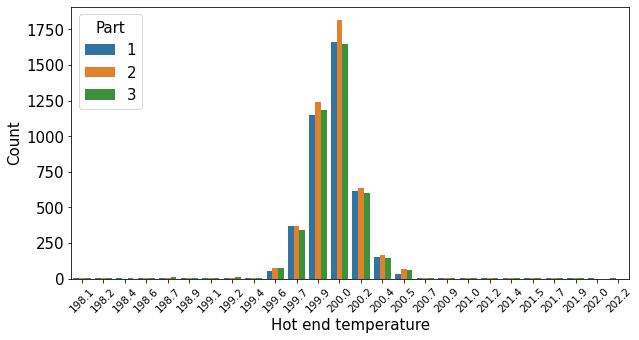

In [19]:
#Countplot
plt.figure(figsize=(10,5))
ax = sns.countplot('Hot_end_temperature',hue = 'Part', data = df)
ax.set(xlabel='Hot end temperature', ylabel='Count')


plt.xticks(
    rotation=45, 
    fontsize='x-small'  
)

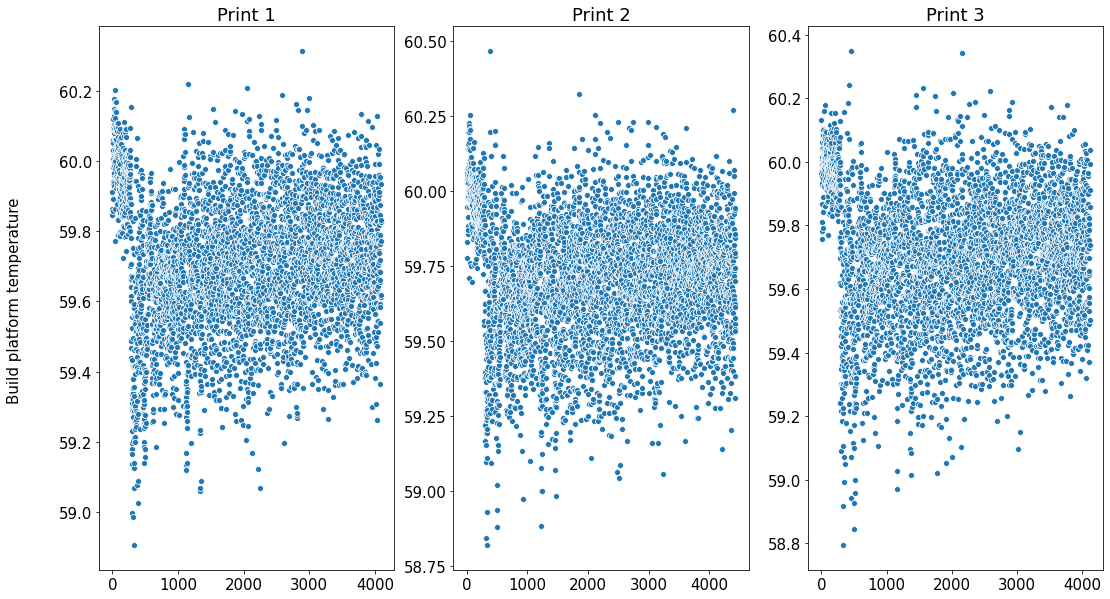

In [20]:
#Ploting scatterplot of build platform temperature for each print 


fig = plt.figure(figsize = (18,10))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
sns.scatterplot(data=df1['Build_platform_temperature'])
ax1.title.set_text('Print 1')

ax2 = plt.subplot(1,3,2)
ax2.title.set_text('Print 2')
sns.scatterplot(data=df2['Build_platform_temperature'])

ax3 = plt.subplot(1,3,3)
ax3.title.set_text('Print 3')
sns.scatterplot(data=df3['Build_platform_temperature'])

fig.text(0.5, 0.04, '', ha='center', va='center')
fig.text(0.06, 0.5, 'Build platform temperature', ha='center', va='center', rotation='vertical')
plt.rcParams["font.size"] = "15"

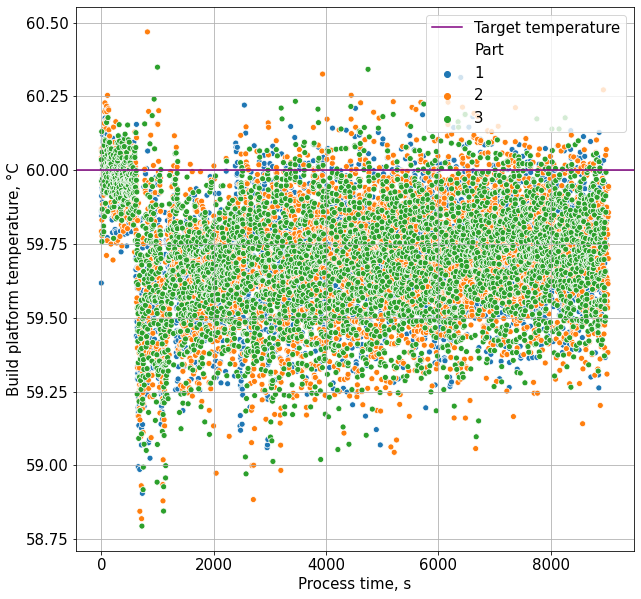

In [21]:
#Satterplot of build platform temperature in single plot
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.scatterplot( x = 'Process_time', y = 'Build_platform_temperature', data = df, hue = 'Part', palette=["C0", "C1", "C2"])
ax.axhline(df['Build_platform_target_temperature'][0], color='purple', label='Target temperature')
legend = plt.legend(loc ='upper right')

legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Build platform temperature, \xb0C")
#plt.style.use("dark_background")
plt.grid()
  
plt.show()

In [22]:
#Comparing print data such as hot end temperature, build platform, and process time for CMM data.

Parts = {'Part1': [df1.Process_time.max(),
                  df1.Hot_end_temperature.mean(),
                  df1.Hot_end_temperature.min(),
                  df1.Hot_end_temperature.max(),
                  df1.Hot_end_temperature.std(),
                  df1.Build_platform_temperature.min(),
                  df1.Build_platform_temperature.max(),
                  df1.Build_platform_temperature.std()],
        'Part2': [df2.Process_time.max(),
                  df2.Hot_end_temperature.mean(),
                  df2.Hot_end_temperature.min(),
                  df2.Hot_end_temperature.max(),
                  df2.Hot_end_temperature.std(),
                  df2.Build_platform_temperature.min(),
                  df2.Build_platform_temperature.max(),
                  df2.Build_platform_temperature.std()],
        'Part3':[df3.Process_time.max(),
                 df3.Hot_end_temperature.mean(),
                  df3.Hot_end_temperature.min(),
                  df3.Hot_end_temperature.max(),
                  df3.Hot_end_temperature.std(),
                  df3.Build_platform_temperature.min(),
                  df3.Build_platform_temperature.max(),
                  df3.Build_platform_temperature.std()],
        }


df_cmm = pd.DataFrame(Parts, columns = ['Part1','Part2','Part3'], index=['Total process time (s)',
                                                                    'Hot end temperature\xb0C mean',
                                                                    'Hot end temperature\xb0C min',
                                                                    'Hot end temperature\xb0C max',
                                                                    'Hot end temperature\xb0C std',
                                                                    'Build platform temperature\xb0C max',
                                                                    'Build platform temperature\xb0C min',
                                                                   'Build platform temperature\xb0C std'])

#Option to change which shows only 2 decimals
pd.options.display.float_format = '{:,.2f}'.format
df_cmm.style.set_caption("Ultimaker").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '20px')
    ]
}])

,Part1,Part2,Part3
Total process time (s),8999.000000,9034.000000,8988.000000
Hot end temperature°C mean,199.986807,199.988580,199.986075
Hot end temperature°C min,198.100000,198.100000,198.100000
Hot end temperature°C max,202.200000,201.900000,201.900000
Hot end temperature°C std,0.228455,0.225908,0.232362
Build platform temperature°C max,58.905377,58.819473,58.794445
Build platform temperature°C min,60.313894,60.468167,60.348769
Build platform temperature°C std,0.192475,0.207069,0.206489
